In [0]:
import numpy as np
import pandas as pd

In [0]:
players = pd.read_csv('sample_data/Players.csv')
stats = pd.read_csv('sample_data/Seasons_Stats.csv')

In [4]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [5]:
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [0]:
players.dropna(subset=['Player'], how='all', inplace = True)
stats.dropna(subset=['Player'], how='all', inplace = True)
try:
    del stats['blanl']
    del stats['blank2']
except:
    print('уже удалено')

In [7]:
print(players.shape, stats.shape)

(3921, 8) (24624, 51)


In [0]:
def nul_deletion(data, coef):
    for col in data.columns:
        temp_null_count = data[data[col].isnull()].shape[0]
        if temp_null_count>data[col].shape[0]*coef:
            del data[col]
        else:
            if data[col].dtype != 'O':
                data[col]=data[col].fillna(data[col].median())
    data.fillna(method='bfill', inplace =True)
    data.fillna(method='ffill', inplace =True)

In [0]:
nul_deletion(players, 0.3)
nul_deletion(stats, 0.3)

In [12]:
print(players.shape, stats.shape)


(3921, 8) (24624, 50)


In [0]:
players.rename(columns={'Unnamed: 0': 'Player_id'}, inplace=True)
stats.rename(columns={'Unnamed: 0': 'Player_id'}, inplace=True)

In [0]:
def first(data):
    return data.iloc[0]

In [15]:
first_keys=['Player_id','Year', 'Age', 'Player', 'Pos', 'Tm']
col_agg_d= {}
col_agg_d.update(dict.fromkeys(first_keys, first))
col_agg_d.update(dict.fromkeys(stats.columns[6:], np.mean))
stats=stats.groupby(['Player']).agg(col_agg_d).sort_values(('Player_id'), ascending=True)
stats = stats.reset_index(drop=True)
for i in range(stats.shape[0]):
    stats.at[i, 'Player_id'] = i
stats.head()

,Player_id,Year,Age,Player,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,31.0,Curly Armstrong,G-F,FTW,50.500000,8.0,1053.000000,12.700000,0.370000,0.064,0.427500,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-2.000000e-01,2.25,2.050,0.075000,-1.5,-0.5,-1.8,0.0,108.0,374.000000,0.294500,2.0,11.0,108.0,374.000000,0.294500,0.294500,114.000000,165.5,0.674500,38.0,106.0,124.000000,126.5,29.0,11.0,55.0,157.000000,330.000000
1,1,1950.0,29.0,Cliff Barker,SG,INO,49.666667,8.0,866.666667,12.066667,0.366667,0.064,0.361667,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,3.700743e-17,0.70,0.700,0.052667,-1.5,-0.5,-1.8,0.0,67.0,212.333333,0.307333,2.0,11.0,67.0,212.333333,0.307333,0.307333,51.666667,78.0,0.648333,38.0,106.0,113.333333,98.0,29.0,11.0,55.0,84.333333,185.666667
2,2,1950.0,25.0,Leo Barnhorst,SF,CHS,68.800000,8.0,1877.000000,14.000000,0.395800,0.064,0.208800,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,6.000000e-01,2.50,3.120,0.079600,-1.5,-0.5,-1.8,0.0,271.2,737.800000,0.362200,2.0,11.0,271.2,737.800000,0.362200,0.362200,104.000000,156.4,0.676800,38.0,106.0,333.000000,223.2,29.0,11.0,55.0,206.600000,646.400000
3,3,1950.0,24.0,Ed Bartels,F,TOT,11.750000,8.0,1053.000000,12.700000,0.325750,0.064,0.499250,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-4.500000e-01,0.00,-0.425,0.075000,-1.5,-0.5,-1.8,0.0,17.0,67.250000,0.252250,2.0,11.0,17.0,67.250000,0.252250,0.252250,15.500000,28.5,0.574000,38.0,106.0,140.250000,13.0,29.0,11.0,55.0,28.000000,49.500000
4,4,1950.0,22.0,Ralph Beard,G,INO,63.000000,8.0,1053.000000,12.700000,0.428500,0.064,0.321000,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,3.850000e+00,1.75,5.650,0.075000,-1.5,-0.5,-1.8,0.0,374.5,1023.000000,0.365500,2.0,11.0,374.5,1023.000000,0.365500,0.365500,254.000000,330.0,0.768500,38.0,106.0,205.000000,275.5,29.0,11.0,55.0,114.000000,1003.000000


In [0]:
players_with_stats = pd.merge(players, stats, left_on='Player_id', right_on='Player_id', how='inner')
players_with_stats.rename(columns={'Player_x': 'Player'}, inplace=True)
try:
    del players_with_stats['Player_y']
except:
    pass

In [18]:
try:
    del players_with_stats['Player_id']
    del players_with_stats['Player']
except:
    pass
players_with_stats.shape

(3920, 54)

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
cat_col=['birth_city', 'birth_state', 'Pos', 'Tm', 'collage']

In [22]:
ohe = OneHotEncoder()
pws_ohe = ohe.fit_transform(players_with_stats[cat_col])
pws_ohe = pd.DataFrame(pws_ohe.toarray())
pws = pd.concat([players_with_stats, pws_ohe], axis=1)
print(pws_ohe.shape, pws.shape)

(3920, 1902) (3920, 1956)


In [23]:
pws.head()

,height,weight,collage,born,birth_city,birth_state,Year,Age,Pos,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,2P,2PA,...,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901
0,180.0,77.0,Indiana University,1918.0,Yorktown,Indiana,1950.0,31.0,G-F,FTW,50.500000,8.0,1053.000000,12.700000,0.370000,0.064,0.427500,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-2.000000e-01,2.25,2.050,0.075000,-1.5,-0.5,-1.8,0.0,108.0,374.000000,0.294500,2.0,11.0,108.0,374.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950.0,29.0,SG,INO,49.666667,8.0,866.666667,12.066667,0.366667,0.064,0.361667,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,3.700743e-17,0.70,0.700,0.052667,-1.5,-0.5,-1.8,0.0,67.0,212.333333,0.307333,2.0,11.0,67.0,212.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,193.0,86.0,University of Notre Dame,1924.0,Hardinsburg,Kentucky,1950.0,25.0,SF,CHS,68.800000,8.0,1877.000000,14.000000,0.395800,0.064,0.208800,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,6.000000e-01,2.50,3.120,0.079600,-1.5,-0.5,-1.8,0.0,271.2,737.800000,0.362200,2.0,11.0,271.2,737.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,196.0,88.0,North Carolina State University,1925.0,Hardinsburg,Kentucky,1950.0,24.0,F,TOT,11.750000,8.0,1053.000000,12.700000,0.325750,0.064,0.499250,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,-4.500000e-01,0.00,-0.425,0.075000,-1.5,-0.5,-1.8,0.0,17.0,67.250000,0.252250,2.0,11.0,17.0,67.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,1950.0,22.0,G,INO,63.000000,8.0,1053.000000,12.700000,0.428500,0.064,0.321000,5.4,12.7,9.2,10.5,1.5,0.9,14.2,18.6,3.850000e+00,1.75,5.650,0.075000,-1.5,-0.5,-1.8,0.0,374.5,1023.000000,0.365500,2.0,11.0,374.5,1023.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
try:
    for col in cat_col:
        del pws[col]
except:
    pass
pws.shape

(3920, 1951)

In [0]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
%matplotlib inline

In [0]:
norm = Normalizer()
pws_norm = norm.fit_transform(pws)

<function matplotlib.pyplot.show>

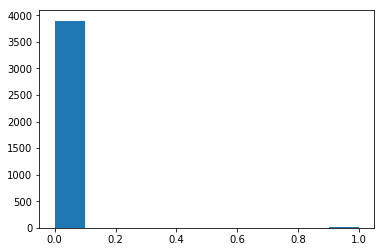

In [27]:
plt.hist(pws.values[:, 1900])
plt.show

<function matplotlib.pyplot.show>

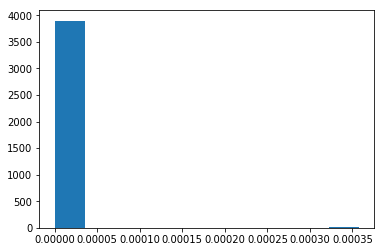

In [28]:
plt.hist(pws_norm[:, 1900])
plt.show